In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('bank_transactions.csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


Checking on Null values in the dataframe

In [3]:
null_columns = df.columns[df.isnull().any()]
null_dob = df[df['CustomerDOB'].isnull()]
null_gender = df[df['CustGender'].isnull()]
null_location = df[df['CustLocation'].isnull()]
null_balance = df[df['CustAccountBalance'].isnull()]
print("columns with null values: ", null_columns)
print("Date of Birth null shape: ", null_dob.shape)
print("gender null shape: ", null_gender.shape)
print("location null shape: ", null_location.shape)
print("balance null shape: ", null_balance.shape)

columns with null values:  Index(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance'], dtype='object')
Date of Birth null shape:  (3397, 9)
gender null shape:  (1100, 9)
location null shape:  (151, 9)
balance null shape:  (2369, 9)


We decided to fill the null values using the mode and mean values such that CustGender we fill with the mode of the gender, CustLocation we fill with the mode of the location and the CustAccountBalance we fill with the mean of the account balance. We identified that under the CustomerDOB column, there are rare occurences where there are date of 1/1/1800 which seems not realistic. We decided to remove it from the dataframe. The TransactionTime is changed to str for easier slicing process

In [4]:
# Calculate the mode and mean before dropping rows
mode_gender = df['CustGender'].mode()[0]
mode_location = df['CustLocation'].mode()[0]
mean_balance = df['CustAccountBalance'].mean()

# Drop rows with missing 'CustomerDOB'
df = df.dropna(subset=['CustomerDOB'])

# Using .loc to fill missing values
df.loc[:, 'CustGender'].fillna(mode_gender, inplace=True)
df.loc[:, 'CustLocation'].fillna(mode_location, inplace=True)
df.loc[:, 'CustAccountBalance'].fillna(mean_balance, inplace=True)

# drop rows in the CustomerDOB with the value of 1/1/1800
df = df.drop(df[df['CustomerDOB'] == '1/1/1800'].index)

# Change the TransactionTime column data type to object / string
df['TransactionTime'] = df['TransactionTime'].astype(str)

C:\Users\azriy\AppData\Local\Temp\ipykernel_23004\3346182121.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[:, 'CustGender'].fillna(mode_gender, inplace=True)
C:\Users\azriy\AppData\Local\Temp\ipykernel_23004\3346182121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'CustGender'].fillna(mode_gender, inplace=True)
C

We identified that the CustomerDOB, TransactionDate, and TransactionTime column have a wrong format for the date and time. So we decided to change the format for each columns. For TransactionDate and TransactionTime we decide to combine it into columnd TransactionDateTime

In [5]:
def convert_and_format_dates_and_times(df):

    # formatting CustomerDOB columns do datetime
    if not pd.api.types.is_datetime64_any_dtype(df['CustomerDOB']):
        df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'].str[:-2] + '19' + df['CustomerDOB'].str[-2:], format='%d/%m/%Y', errors='coerce')
    
    # Create TransactionDateTime columns combining both TransactionDate and TransactionTime
    df['TransactionDateTime'] = pd.to_datetime(df['TransactionDate'].str[:-2] + '20' + df['TransactionDate'].str[-2:] + " " + df['TransactionTime'].str.zfill(6), format='%d/%m/%Y %H%M%S', errors='coerce')
    
    return df

df = convert_and_format_dates_and_times(df)

we copy the original dataframe into the new variable

In [6]:
df_cleaned = df.copy()
df_cleaned

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionDateTime
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,2016-08-02 14:32:07
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,2016-08-02 14:18:58
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0,2016-08-02 14:27:12
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0,2016-08-02 14:27:14
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,2016-08-02 18:11:56
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,18/9/16,184824,799.0,2016-09-18 18:48:24
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,18/9/16,183734,460.0,2016-09-18 18:37:34
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,18/9/16,183313,770.0,2016-09-18 18:33:13
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,2016-09-18 18:47:06


function to calculate age for each customer based on the CustomerDOB and TransactionDateTime

In [7]:
def calculate_age(birthdate, transaction_date_time):
    # Calculate age
    age = transaction_date_time.year - birthdate.year
    # Check if the birthday has occurred this year
    if transaction_date_time.month < birthdate.month or (transaction_date_time.month == birthdate.month and transaction_date_time.day < birthdate.day):
        age -= 1
    return age

In [8]:
df_cleaned['age'] = df_cleaned.apply(lambda row: calculate_age(row['CustomerDOB'], row['TransactionDateTime']), axis=1)
df_cleaned

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionDateTime,age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,2016-08-02 14:32:07,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,2016-08-02 14:18:58,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0,2016-08-02 14:27:12,19
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0,2016-08-02 14:27:14,42
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,2016-08-02 18:11:56,28
...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,18/9/16,184824,799.0,2016-09-18 18:48:24,26
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,18/9/16,183734,460.0,2016-09-18 18:37:34,24
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,18/9/16,183313,770.0,2016-09-18 18:33:13,27
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,2016-09-18 18:47:06,38


We want to have 6 bin to classify each customer into 6 group of ages

In [9]:
bins_age = [16, 20, 30, 40, 50, 60, 70]
group_names = ['Teenagers', '20s', '30s', '40s', '50s', '60+']
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins_age, labels=group_names, include_lowest=True)

### Question 1: What is the distribution of number of transaction among the different age group? (descriptive question)
Bar chart that show the distribution of the frequency of transaction based on the age group

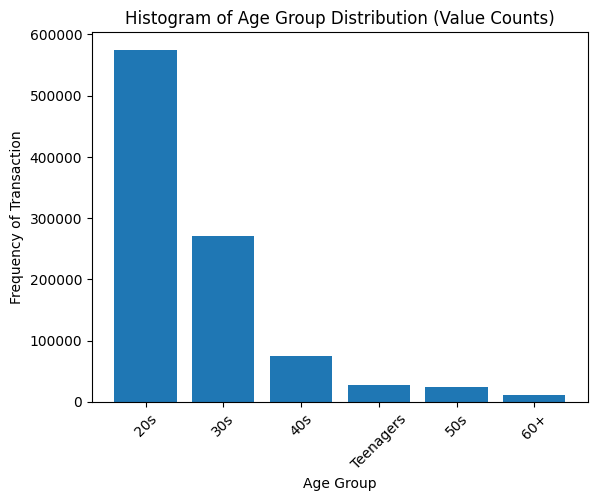

In [10]:
ageGroup_valueCount = df_cleaned["age_group"].value_counts()
age_groups = ageGroup_valueCount.index.to_numpy()  # Get category labels (age groups)
frequencies = ageGroup_valueCount.to_numpy()  # Get frequencies (number of people in each group)

# Create the histogram
plt.bar(age_groups, frequencies)  # Plot bars for each age group with corresponding frequency

plt.xlabel("Age Group")
plt.ylabel("Frequency of Transaction")
plt.title("Histogram of Age Group Distribution (Value Counts)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if many categories

# Display the histogram
plt.show()

In [11]:
#checking how many unique value in CustomerID column
df_cleaned['CustomerID'].nunique()

840889

### Question 4: Can unusual transaction patterns be detected to identify potential fraudulent activities?

1. **Features Engineering:**
   - We start by extracting various time-related features from the `TransactionDateTime` column, such as `TransactionHour`, `TransactionDayOfWeek`, and `TransactionMonth`. These features help us understand patterns based on when transactions occur during the day, week, and month.

In [12]:
df['TransactionHour'] = df['TransactionDateTime'].dt.hour
df['TransactionDayOfWeek'] = df['TransactionDateTime'].dt.dayofweek
df['TransactionMonth'] = df['TransactionDateTime'].dt.month

2. **Calculating Additional Metrics:**
   - Next, we compute more advanced metrics like `AvgTransactionAmount` and `TransactionCount` for each customer. These metrics give us insights into average transaction amounts and the total number of transactions each customer has made. This helps in understanding customer behavior and their financial activities.

In [13]:
df['AvgTransactionAmount'] = df.groupby('CustomerID')['TransactionAmount (INR)'].transform('mean')
df['TransactionCount'] = df.groupby('CustomerID')['TransactionID'].transform('count')


3. **Correlation Matrix:**
   - We create a correlation matrix to see how strongly each numerical feature (like transaction amount, account balance, etc.) correlates with others. A correlation close to 1 means two features are highly positively correlated (they move in the same direction), while a correlation close to -1 means they are negatively correlated (they move in opposite directions).

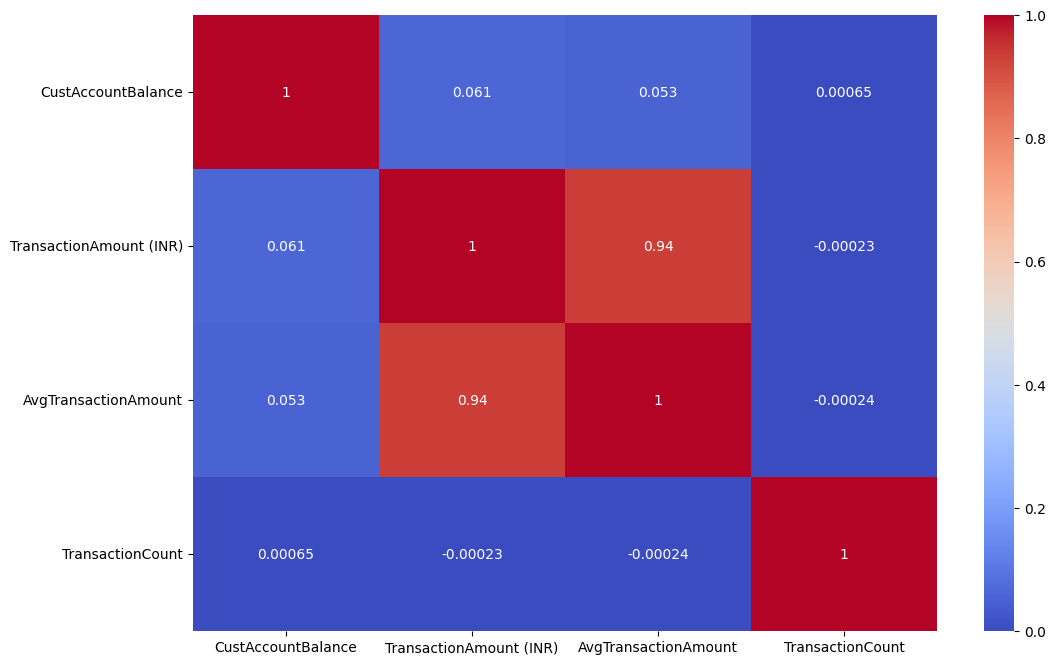

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


4. **Anomaly Detection:**
   - Anomaly detection helps us identify unusual transactions that might indicate fraud or errors. We use the Isolation Forest algorithm, which is good at identifying outliers in data. We choose specific features (like transaction amount, account balance, time-related features) that are likely to be indicative of anomalies.
   - After running the anomaly detection model, we label transactions as normal (`0`) or anomalous (`1`). The algorithm assigns a score (`-1` for anomalies and `1` for normal transactions).

In [15]:
from sklearn.ensemble import IsolationForest

# Selecting features for anomaly detection
features = ['TransactionAmount (INR)', 'CustAccountBalance', 'TransactionHour', 'TransactionDayOfWeek', 'TransactionMonth','TransactionCount']

# Fitting the model
iso_forest = IsolationForest(contamination=0.01)  # Adjust contamination as needed
df['anomaly'] = iso_forest.fit_predict(df[features])

# Mark anomalies
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Display the number of anomalies detected
print("Number of anomalies detected:", df['anomaly'].sum())


Number of anomalies detected: 9879


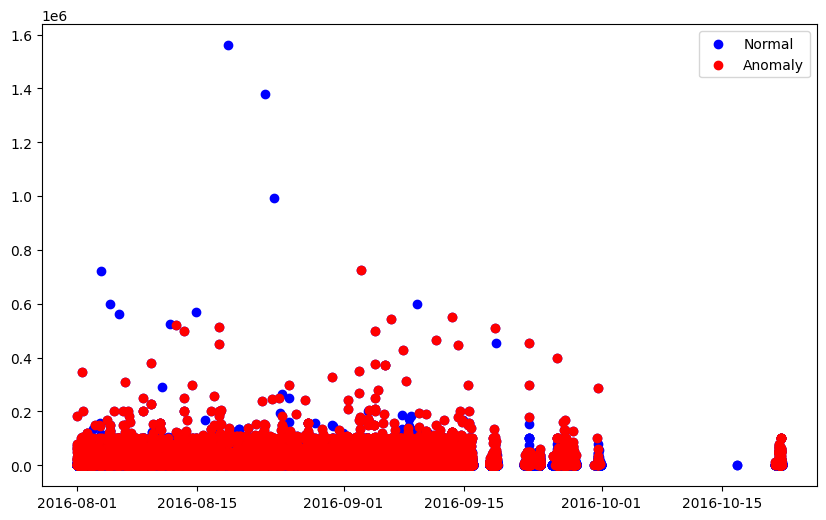

In [16]:
# Plot anomalies
anomalies = df[df['anomaly'] == 1]
plt.figure(figsize=(10, 6))
plt.scatter(df['TransactionDateTime'], df['TransactionAmount (INR)'], c='blue', label='Normal')
plt.scatter(anomalies['TransactionDateTime'], anomalies['TransactionAmount (INR)'], c='red', label='Anomaly')
plt.legend()
plt.show()

5. **Counting and Reviewing Anomalies:**
   - We count how many anomalies were detected and then sample some flagged anomalies for manual review. This step helps in confirming whether the anomalies are indeed suspicious transactions or just unusual but legitimate ones.


In [17]:
# Sample a few flagged anomalies for manual review
anomalies = df[df['anomaly'] == 1]
normal_transactions = df[df['anomaly'] == 0]

# Select relevant columns for comparison
columns_of_interest = ['TransactionHour', 'TransactionDayOfWeek', 'TransactionMonth', 'AvgTransactionAmount', 'TransactionCount']

# Calculate mean values for normal transactions
normal_mean = normal_transactions[columns_of_interest].mean()

# Calculate mean values for anomalies
anomaly_mean = anomalies[columns_of_interest].mean()

# Print the comparison
print("Comparison of Mean Values:")
for metric in columns_of_interest:
    print(f"{metric}:")
    print(f"  Normal Transactions: {normal_mean[metric]:.2f}")
    print(f"  Anomalies: {anomaly_mean[metric]:.2f}")
    print()


Comparison of Mean Values:
TransactionHour:
  Normal Transactions: 15.46
  Anomalies: 14.13

TransactionDayOfWeek:
  Normal Transactions: 3.05
  Anomalies: 3.12

TransactionMonth:
  Normal Transactions: 8.38
  Anomalies: 8.49

AvgTransactionAmount:
  Normal Transactions: 1298.17
  Anomalies: 16851.47

TransactionCount:
  Normal Transactions: 1.33
  Anomalies: 1.73



6. **Visualization:**
   - Finally, we visualize the data using a pair plot. This plot shows relationships between pairs of selected features (like transaction amount and account balance) while highlighting anomalies in different colors (blue for normal and red for anomalies). It helps us visually identify any clusters or patterns that might indicate fraudulent or irregular activities.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot of selected features
selected_features = ['TransactionAmount (INR)', 'CustAccountBalance', 'TransactionHour', 'TransactionDayOfWeek', 'TransactionMonth']
sns.pairplot(df[selected_features + ['anomaly']], hue='anomaly', palette={0: "blue", 1: "red"}, diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()